# learning `zoo` and `xts`

## Introduction of `zoo`

`zoo` ([CRAN](https://cran.r-project.org/web/packages/zoo/index.html)) is an S3 class for ordered indexd observations. It stands for Z's ordered observations (it's interesting that it doesn't mention index).

`zoo` index's independence of a particular index class is a key feature. That is, `zoo` object's index can be of various classes (e.g., `Date`, `POSIXct`, or others).

Another key aspect of the `zoo` package is its offering of standard methods to work with `zoo` objects. Those methods are dispatched on the `zoo` class since after all the core offering of `zoo` is an S3 class in the same name.

## Creation of `zoo` objects

The basic idea of creating a `zoo` object involves two parts: 1) a vector or a matrix of data/observations; and 2) an ordered index (i.e., a vector) whose length is the same as the length of the data vector or the number of rows of the matrix.

The creation function is simply `zoo()`. It accpets two arguments.

`zoo(x, order.by)`

1. `x` is the vector or the matrix of observations. Theoretically this can be of any class, but in pratice, most of the methods (e.g., plotting, aggregating, mathmatical operations, etc) are only useful for numeric observations.

1. `order.by` is the index by which the observations should be ordered. It has to be the same length as `NROW(x)`. In theory it can be of any class as well. However, in order for the `zoo` object to properly function, it is assumed that the index has some basic valid operation defined.

  1. `c()` for combination
  1. `length()` for querying length
  1. `MATCH()` for value matching
  1. `[` for subsetting
  1. `ORDER()` for ordering
  1. `as.character()` for pretty printing
  1. `as.numeric()` for computing distance
  
  All these methods are available for standard character and numeric vectors, and vectors of classes `Date`, `POSIXct`, `times` (from packge `chron`), and `timeDate` (from package `timeDate`).

In [1]:
library(zoo)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
set.seed(1071)

### `POSIXct` index

In the first case, an index of `POSIXct` is created using `base::ISOdatetime()`. Alternatively, a `POSIXct` index can be created using the `as.POSIXct()` function.

In [3]:
z1.index <- ISOdatetime(2004, rep(1:2, 5), sample(28, 10, replace = FALSE), 0, 0, 0)
z1.index

 [1] "2004-01-07 +08" "2004-02-13 +08" "2004-01-18 +08" "2004-02-24 +08"
 [5] "2004-01-17 +08" "2004-02-26 +08" "2004-01-05 +08" "2004-02-01 +08"
 [9] "2004-01-14 +08" "2004-02-19 +08"

In [4]:
class(z1.index)

[1] "POSIXct" "POSIXt"

In [5]:
z1.data <- rnorm(length(z1.index))
z1.data

[1]  0.74675994 -1.78439244  1.94078850  1.27384445  0.68625772  0.22170438
 [7]  0.02107873 -2.07607585  0.26975895 -1.40299938

In [6]:
class(z1.data)

[1] "numeric"

Combining the two elements (i.e., index and data) together makes a `zoo` object.

In [7]:
z1 <- zoo(x = z1.data, order.by = z1.index)
z1

 2004-01-05  2004-01-07  2004-01-14  2004-01-17  2004-01-18  2004-02-01 
 0.02107873  0.74675994  0.26975895  0.68625772  1.94078850 -2.07607585 
 2004-02-13  2004-02-19  2004-02-24  2004-02-26 
-1.78439244 -1.40299938  1.27384445  0.22170438 

In [8]:
class(z1)

[1] "zoo"

### `Date` index

In the second case, a `Date` index is created to order a data matrix.

In [9]:
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [10]:
Z.index <- sample(seq.Date(ymd("20210101"), ymd("20210617"), 1), 50, replace = FALSE)
Z.index

[1] "2021-01-01" "2021-03-05" "2021-02-07" "2021-03-13" "2021-05-30"
 [6] "2021-03-25" "2021-04-04" "2021-05-01" "2021-04-02" "2021-01-28"
[11] "2021-05-08" "2021-06-06" "2021-01-13" "2021-02-01" "2021-01-09"
[16] "2021-02-05" "2021-01-17" "2021-03-14" "2021-04-12" "2021-02-22"
[21] "2021-02-23" "2021-05-29" "2021-05-27" "2021-01-15" "2021-04-23"
[26] "2021-03-21" "2021-05-19" "2021-05-14" "2021-02-27" "2021-03-01"
[31] "2021-02-13" "2021-06-16" "2021-05-05" "2021-04-18" "2021-03-20"
[36] "2021-05-07" "2021-01-12" "2021-02-24" "2021-04-22" "2021-04-06"
[41] "2021-01-27" "2021-03-19" "2021-03-15" "2021-05-21" "2021-06-05"
[46] "2021-02-06" "2021-03-30" "2021-02-11" "2021-04-20" "2021-04-19"

In [11]:
class(Z.index)

[1] "Date"

In [12]:
Z.data <- matrix(rnorm(50*3), ncol = 3)
colnames(Z.data) <- c("Aa", "Bb", "Cc")
head(Z.data)

Aa,Bb,Cc
-0.1459740,-1.7359596,-1.8397033
2.0041709,1.4851828,1.2046435
-0.7730781,-0.8203011,0.3584219
-0.5471904,1.0218569,-0.5018807
-0.8378887,1.0683123,0.7285755
1.1419194,0.2222751,-0.2946740


In [13]:
Z <- zoo(x = Z.data, order.by = Z.index)
head(Z)

                    Aa          Bb         Cc
2021-01-01 -0.14597401 -1.73595956 -1.8397033
2021-01-09 -0.49754041  0.75830249 -0.8349174
2021-01-12 -0.19747538 -1.28239489  0.8786695
2021-01-13  1.01913862  0.47079208 -0.4901370
2021-01-15  0.04630992  0.09710551  0.5546205
2021-01-17 -1.18927963 -0.73329159  0.7460067

## Creation of `zooreg` objects

**Strictly regular series** are such series observations where *the distance between the indexes
of every two adjacent observations is the same*. Such series can be described by their frequency (i.e., the reciprocal of the distance between two adjacent observations).

The `zoo` package can be used to create strictly and weakly regular series (as opposed to the `ts` package which only allows strictly regular series). The `zooreg` class is created to store an extra property (i.e., frequency) of a `zoo` object. In this sense, the `zooreg` class is an extension of the `zoo` class.

A `zooreg` object can be crated using the regular `zoo()` function or with a specific `zooreg()` function.

1. `zoo(x, order.by, frequency)`
1. `zooreg(data, start, end, frequency, deltat, ts.eps, order.by)`

Here the most important argument is `frequency` which specifies the number of observations per unit of time. The unit of time is usually a year, so a `frequency = 4` indicates quarterly observations and `frequency = 12` indicates monthly observations.

In [14]:
zr <- zoo(x = sin(1:9), order.by = seq(2000, 2002, by = 1/4), frequency = 4)
zr

   2000 Q1    2000 Q2    2000 Q3    2000 Q4    2001 Q1    2001 Q2    2001 Q3 
 0.8414710  0.9092974  0.1411200 -0.7568025 -0.9589243 -0.2794155  0.6569866 
   2001 Q4    2002 Q1 
 0.9893582  0.4121185 

In [15]:
class(zr)

[1] "zooreg" "zoo"

### Extra attributes and methods of `zooreg` objects

`zooreg` objects have a `frequency` attribute which can be accessed using the `frequency()` function.

In [16]:
frequency(zr)

[1] 4

The function actually works on `zoo` objects too. However, when applied on `zoo` objects, the frequency is inferred and might not be reliable.

In [17]:
frequency(Z)

[1] 1

In addition, there are a few other utility functions that specifically work with `zooreg` objects.

1. The `deltat()` function returns the time interval (represented as fraction of unit of time) between observations.
1. The `cycle()` function gives the position in the cycle of each observation. For example, calling `cycle()` on quarterly observations returns the quarter number of each observation.

In [18]:
deltat(zr)

[1] 0.25

In [19]:
# It's interesting that the result is also a zooreg object
cycle(zr)

2000 Q1 2000 Q2 2000 Q3 2000 Q4 2001 Q1 2001 Q2 2001 Q3 2001 Q4 2002 Q1 
      1       2       3       4       1       2       3       4       1 

Lastly, the `is.regular()` function tests if a `zoo` or `zooreg` object is regular. Using `strict = TRUE` in the function call checks if the object is *strictly* regular.

In [20]:
is.regular(zr)

[1] TRUE

In [21]:
is.regular(zr, strict = TRUE)

[1] TRUE

### Weakly regular series

A `zooreg` object can be weakly regular, that is, it remains a regular series when some observations are dropped. This facilitates `NA` handling better than comparable regular series like `ts`.

In [22]:
# zooreg object sans an internal observation is still a zooreg object
class(zr[-5])

[1] "zooreg" "zoo"

In [23]:
is.regular(zr[-5])

[1] TRUE

In [24]:
# Dropping an internal observation makes the object weakly regular
is.regular(zr[-5], strict = TRUE)

[1] FALSE

## `zoo` object properties and methods

### Properties

At the most fundamental level, a `zoo` object has two elements: an ordered index and data. They can be retrieved using `zoo::index()` and `zoo::coredata()` respectively.

In [25]:
# `zoo` object's index is ordered
identical(index(Z), sort(Z.index))

[1] TRUE

In [26]:
identical(coredata(Z), Z.data[order(Z.index), ])

[1] TRUE

`start()` and `end()` functions work just like the names suggest.

In [27]:
start(Z)

[1] "2021-01-01"

In [28]:
end(Z)

[1] "2021-06-16"

### Methods

The `window()` function "subsets" a `zoo` object by extracting the observations whose index values fall into the specified window.

`window(x, index, start, end)`

In [29]:
# using the full index and specify a start and end
window(Z, start = ymd("2021-02-01"), end = ymd("2021-02-28"))

                   Aa          Bb          Cc
2021-02-01  0.3027276  1.00767462  1.52541560
2021-02-05 -2.0038764 -0.14569308  1.04817937
2021-02-06  0.9682644  0.09288683  0.74080025
2021-02-07 -0.7730781 -0.82030110  0.35842192
2021-02-11 -0.4521628  1.77511926 -1.05201244
2021-02-13 -1.0904488  0.57903612  0.37709862
2021-02-22  1.5162264 -2.14950920  0.30940018
2021-02-23 -0.7562229  0.74956179 -1.02209840
2021-02-24  1.3770314 -1.19715273  0.06241115
2021-02-27  0.8903241 -1.80642880 -0.66519165

In [30]:
# using the full index and only specify the start
window(Z, start = ymd("2021-06-01"))

                   Aa         Bb         Cc
2021-06-05 -0.2598216 -0.8658936 -0.6136069
2021-06-06  0.1711008  1.0853413 -0.1374332
2021-06-16 -1.5074440 -0.0787615 -0.7785695

In [31]:
# using the full index and only specify the end
window(Z, end = ymd("2021-01-31"))

                    Aa          Bb         Cc
2021-01-01 -0.14597401 -1.73595956 -1.8397033
2021-01-09 -0.49754041  0.75830249 -0.8349174
2021-01-12 -0.19747538 -1.28239489  0.8786695
2021-01-13  1.01913862  0.47079208 -0.4901370
2021-01-15  0.04630992  0.09710551  0.5546205
2021-01-17 -1.18927963 -0.73329159  0.7460067
2021-01-27  0.28581298 -0.86876557 -0.7650030
2021-01-28 -1.42211930  0.05078658 -1.0862570

In [32]:
# using a partial index and specify the start
window(Z, index(Z)[1:18], start = ymd("2021-02-01"))

                   Aa          Bb          Cc
2021-02-01  0.3027276  1.00767462  1.52541560
2021-02-05 -2.0038764 -0.14569308  1.04817937
2021-02-06  0.9682644  0.09288683  0.74080025
2021-02-07 -0.7730781 -0.82030110  0.35842192
2021-02-11 -0.4521628  1.77511926 -1.05201244
2021-02-13 -1.0904488  0.57903612  0.37709862
2021-02-22  1.5162264 -2.14950920  0.30940018
2021-02-23 -0.7562229  0.74956179 -1.02209840
2021-02-24  1.3770314 -1.19715273  0.06241115
2021-02-27  0.8903241 -1.80642880 -0.66519165

## Merging and binding of `zoo` objects

The `rbind()` method combines `zoo` objects by stitching them together vertically. So the numbers of columns of the participating objects must be the same. Also, their indexes can't overlap because otherwise there will be duplicated indexes in the combined object. Lastly, the `c()` method basically calls `rbind()` and works in the same way.

In [33]:
rbind(Z[1:2], Z[3:4])

                   Aa         Bb         Cc
2021-01-01 -0.1459740 -1.7359596 -1.8397033
2021-01-09 -0.4975404  0.7583025 -0.8349174
2021-01-12 -0.1974754 -1.2823949  0.8786695
2021-01-13  1.0191386  0.4707921 -0.4901370

In [34]:
# index overlap results in error
rbind(Z[1:3], Z[3:5])

ERROR: Error in rbind(deparse.level, ...): indexes overlap


The `cbind()` method by default combines the columns by the *union* of the indexes and fills the created gaps with `NA`s.

In [35]:
cbind(z1a = z1[1:5], z1b = z1[6:10])

                  z1a        z1b
2004-01-05 0.02107873         NA
2004-01-07 0.74675994         NA
2004-01-14 0.26975895         NA
2004-01-17 0.68625772         NA
2004-01-18 1.94078850         NA
2004-02-01         NA -2.0760758
2004-02-13         NA -1.7843924
2004-02-19         NA -1.4029994
2004-02-24         NA  1.2738445
2004-02-26         NA  0.2217044

The `cbind()` method is synonymous with the `merge()` method except that the latter provides an `all = FALSE` argument which allows combination by the *intersection* of the indexes.

In [36]:
# merge by intersection rather than union
merge(z1a = z1[1:9], z1b = z1[2:10], all = FALSE)

                  z1a        z1b
2004-01-07  0.7467599  0.7467599
2004-01-14  0.2697590  0.2697590
2004-01-17  0.6862577  0.6862577
2004-01-18  1.9407885  1.9407885
2004-02-01 -2.0760758 -2.0760758
2004-02-13 -1.7843924 -1.7843924
2004-02-19 -1.4029994 -1.4029994
2004-02-24  1.2738445  1.2738445

## Aggregating and disaggregating

The `aggregate()` method splits a `zoo` object into subsets along a coarser index (e.g., daily to weekly or monthly) and compute summary statistics for each subset. The `tidyverse` equivalent of this operation would be `summarize(group_by(...))`.

In [37]:
# mean values by month
aggregate(Z, floor_date(index(Z), "month"), mean)

                     Aa          Bb         Cc
2021-01-01 -0.262640902 -0.40542812 -0.3545901
2021-02-01 -0.002121503 -0.19148063  0.1682425
2021-03-01  0.241425271  0.26178893  0.1458949
2021-04-01  0.183573371  0.17390747  0.1999531
2021-05-01 -0.300044508 -0.09864025  0.1353726
2021-06-01 -0.532054947  0.04689540 -0.5098698

In [38]:
# first value of a month
aggregate(Z, floor_date(index(Z), "month"), head, 1)

                   Aa         Bb         Cc
2021-01-01 -0.1459740 -1.7359596 -1.8397033
2021-02-01  0.3027276  1.0076746  1.5254156
2021-03-01 -0.5405787  0.1058980  0.1667820
2021-04-01  1.1929626  1.2185183 -0.9888373
2021-05-01 -0.5000138  0.8102893 -0.6458542
2021-06-01 -0.2598216 -0.8658936 -0.6136069

Disaggregating is the opposite of aggregating. It can be done by

1. Inserting `NA` values for intermediate subinterval periods (e.g., quarterly `NA`s within yearly observations)
2. Using interpolation functions (e.g., `na.approx()`, `na.locf()`, and `na.spline()`) to impute the values

In [39]:
# create a yearly series
Z.yearly <- zoo(c(1:10)^3, seq(2000, 2009, 1), 1)
Z.yearly

2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 
   1    8   27   64  125  216  343  512  729 1000 

In [40]:
# insert NAs for intermediate subintervals
Z.quarterly <- merge(Z.yearly, zoo(order.by = seq(2000, 2009, 1/4), frequency = 4))
Z.quarterly

Warning message in merge.zoo(Z.yearly, zoo(order.by = seq(2000, 2009, 1/4), frequency = 4)):
“Index vectors are of different classes: numeric yearqtr”


2000(1) 2000(2) 2000(3) 2000(4) 2001(1) 2001(2) 2001(3) 2001(4) 2002(1) 2002(2) 
      1      NA      NA      NA       8      NA      NA      NA      27      NA 
2002(3) 2002(4) 2003(1) 2003(2) 2003(3) 2003(4) 2004(1) 2004(2) 2004(3) 2004(4) 
     NA      NA      64      NA      NA      NA     125      NA      NA      NA 
2005(1) 2005(2) 2005(3) 2005(4) 2006(1) 2006(2) 2006(3) 2006(4) 2007(1) 2007(2) 
    216      NA      NA      NA     343      NA      NA      NA     512      NA 
2007(3) 2007(4) 2008(1) 2008(2) 2008(3) 2008(4) 2009(1) 
     NA      NA     729      NA      NA      NA    1000 

In [41]:
# na.approx is linear approximation
Z.quarterly.approx <- na.approx(Z.quarterly)
Z.quarterly.approx

2000(1) 2000(2) 2000(3) 2000(4) 2001(1) 2001(2) 2001(3) 2001(4) 2002(1) 2002(2) 
   1.00    2.75    4.50    6.25    8.00   12.75   17.50   22.25   27.00   36.25 
2002(3) 2002(4) 2003(1) 2003(2) 2003(3) 2003(4) 2004(1) 2004(2) 2004(3) 2004(4) 
  45.50   54.75   64.00   79.25   94.50  109.75  125.00  147.75  170.50  193.25 
2005(1) 2005(2) 2005(3) 2005(4) 2006(1) 2006(2) 2006(3) 2006(4) 2007(1) 2007(2) 
 216.00  247.75  279.50  311.25  343.00  385.25  427.50  469.75  512.00  566.25 
2007(3) 2007(4) 2008(1) 2008(2) 2008(3) 2008(4) 2009(1) 
 620.50  674.75  729.00  796.75  864.50  932.25 1000.00 

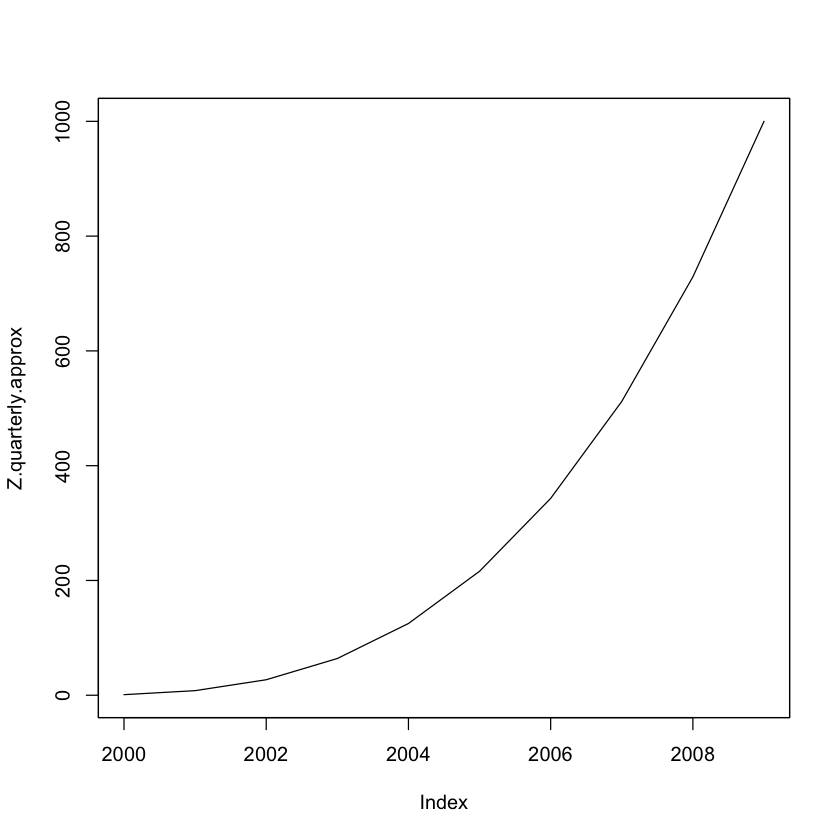

In [42]:
plot(Z.quarterly.approx)

In [43]:
# na.locf is last observation carry forward
Z.quarterly.locf <- na.locf(Z.quarterly)
Z.quarterly.locf

2000(1) 2000(2) 2000(3) 2000(4) 2001(1) 2001(2) 2001(3) 2001(4) 2002(1) 2002(2) 
      1       1       1       1       8       8       8       8      27      27 
2002(3) 2002(4) 2003(1) 2003(2) 2003(3) 2003(4) 2004(1) 2004(2) 2004(3) 2004(4) 
     27      27      64      64      64      64     125     125     125     125 
2005(1) 2005(2) 2005(3) 2005(4) 2006(1) 2006(2) 2006(3) 2006(4) 2007(1) 2007(2) 
    216     216     216     216     343     343     343     343     512     512 
2007(3) 2007(4) 2008(1) 2008(2) 2008(3) 2008(4) 2009(1) 
    512     512     729     729     729     729    1000 

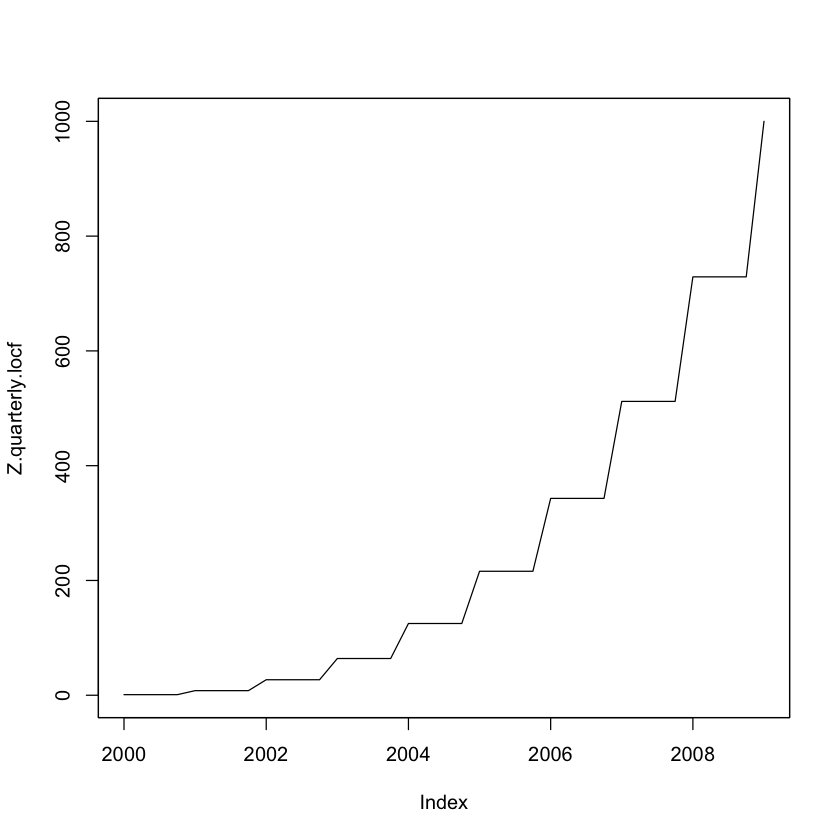

In [44]:
plot(Z.quarterly.locf)

In [45]:
# na.spline used spline interpolation
Z.quarterly.spline <- na.spline(Z.quarterly)
Z.quarterly.spline

    2000(1)     2000(2)     2000(3)     2000(4)     2001(1)     2001(2) 
   1.000000    1.953125    3.375000    5.359375    8.000000   11.390625 
    2001(3)     2001(4)     2002(1)     2002(2)     2002(3)     2002(4) 
  15.625000   20.796875   27.000000   34.328125   42.875000   52.734375 
    2003(1)     2003(2)     2003(3)     2003(4)     2004(1)     2004(2) 
  64.000000   76.765625   91.125000  107.171875  125.000000  144.703125 
    2004(3)     2004(4)     2005(1)     2005(2)     2005(3)     2005(4) 
 166.375000  190.109375  216.000000  244.140625  274.625000  307.546875 
    2006(1)     2006(2)     2006(3)     2006(4)     2007(1)     2007(2) 
 343.000000  381.078125  421.875000  465.484375  512.000000  561.515625 
    2007(3)     2007(4)     2008(1)     2008(2)     2008(3)     2008(4) 
 614.125000  669.921875  729.000000  791.453125  857.375000  926.859375 
    2009(1) 
1000.000000 

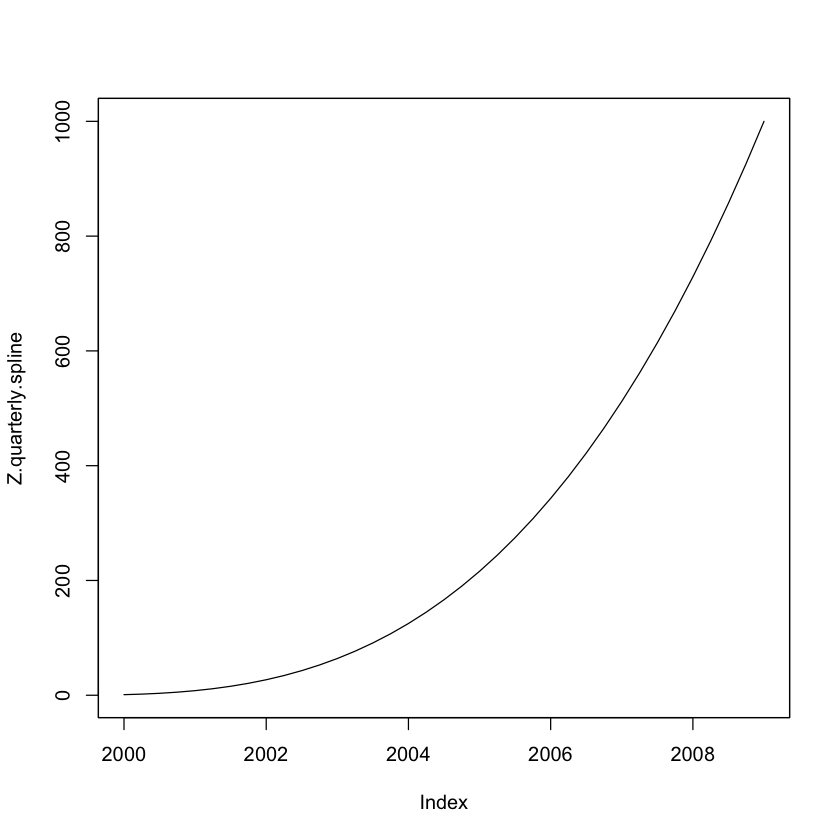

In [46]:
plot(Z.quarterly.spline)

## Replacing data and index

`coredata()` and `index()` functions can be used to extract the data and index elements of a `zoo` object. They have two companion functions (i.e., `coredata(...)<-` and `index(...)<-`) that allow assignment.

In [47]:
index(Z) <- ymd(index(Z)) - years(1)
head(Z)

                    Aa          Bb         Cc
2020-01-01 -0.14597401 -1.73595956 -1.8397033
2020-01-09 -0.49754041  0.75830249 -0.8349174
2020-01-12 -0.19747538 -1.28239489  0.8786695
2020-01-13  1.01913862  0.47079208 -0.4901370
2020-01-15  0.04630992  0.09710551  0.5546205
2020-01-17 -1.18927963 -0.73329159  0.7460067

In [48]:
coredata(Z) <- coredata(Z) * 2
head(Z)

                    Aa         Bb        Cc
2020-01-01 -0.29194801 -3.4719191 -3.679407
2020-01-09 -0.99508082  1.5166050 -1.669835
2020-01-12 -0.39495076 -2.5647898  1.757339
2020-01-13  2.03827724  0.9415842 -0.980274
2020-01-15  0.09261983  0.1942110  1.109241
2020-01-17 -2.37855926 -1.4665832  1.492013

`window(...)<-` can be used to replace the data for a window rather than the entire `zoo` object.

In [49]:
# the pre-replacement tail
tail(Z)

                   Aa        Bb         Cc
2020-05-27 -2.6071029  1.352302 -3.2673285
2020-05-29 -0.5088015 -4.502878  1.7965025
2020-05-30 -1.6757775  2.136625  1.4571510
2020-06-05 -0.5196433 -1.731787 -1.2272137
2020-06-06  0.3422016  2.170683 -0.2748664
2020-06-16 -3.0148880 -0.157523 -1.5571390

In [50]:
# replace the tail using window()<-
window(Z, start = ymd("2021-05-27")) <- coredata(window(Z, start = ymd("2021-05-27"))) * 2
tail(Z)

                   Aa        Bb         Cc
2020-05-27 -2.6071029  1.352302 -3.2673285
2020-05-29 -0.5088015 -4.502878  1.7965025
2020-05-30 -1.6757775  2.136625  1.4571510
2020-06-05 -0.5196433 -1.731787 -1.2272137
2020-06-06  0.3422016  2.170683 -0.2748664
2020-06-16 -3.0148880 -0.157523 -1.5571390

## Lagging and diffing

One common operation done on an indexed series is to find previous (i.e., `lagging = -1`) and subsequent (i.e., `lagging = 1`) values. 

In [51]:
head(Z)

                    Aa         Bb        Cc
2020-01-01 -0.29194801 -3.4719191 -3.679407
2020-01-09 -0.99508082  1.5166050 -1.669835
2020-01-12 -0.39495076 -2.5647898  1.757339
2020-01-13  2.03827724  0.9415842 -0.980274
2020-01-15  0.09261983  0.1942110  1.109241
2020-01-17 -2.37855926 -1.4665832  1.492013

In [52]:
# previous values
head(lag(Z, k = -1))

                    Aa         Bb        Cc
2020-01-09 -0.29194801 -3.4719191 -3.679407
2020-01-12 -0.99508082  1.5166050 -1.669835
2020-01-13 -0.39495076 -2.5647898  1.757339
2020-01-15  2.03827724  0.9415842 -0.980274
2020-01-17  0.09261983  0.1942110  1.109241
2020-01-27 -2.37855926 -1.4665832  1.492013

In [53]:
# subsequent values
head(lag(Z, k = 1))

                    Aa         Bb        Cc
2020-01-01 -0.99508082  1.5166050 -1.669835
2020-01-09 -0.39495076 -2.5647898  1.757339
2020-01-12  2.03827724  0.9415842 -0.980274
2020-01-13  0.09261983  0.1942110  1.109241
2020-01-15 -2.37855926 -1.4665832  1.492013
2020-01-17  0.57162595 -1.7375311 -1.530006

The `diff()` function computes the difference between the current value and the previous value.

In [54]:
head(diff(Z))

                   Aa         Bb         Cc
2020-01-09 -0.7031328  4.9885241  2.0095718
2020-01-12  0.6001301 -4.0813948  3.4271737
2020-01-13  2.4332280  3.5063739 -2.7376129
2020-01-15 -1.9456574 -0.7473731  2.0895150
2020-01-17 -2.4711791 -1.6607942  0.3827723
2020-01-27  2.9501852 -0.2709480 -3.0220195

## Rolling functions

A typical task to be performed on ordered observations is to evaluate some function, e.g., computing the mean, in a *window of observations* that is moved over the full sample period.

`rollapply()` is the generic function that applies another function to a rolling window.

`rollapply(data, width, FUN)` is the most basic form of calling the `rollapply()` function.

1. `data` accepts a `zoo` or `ts` object.
1. `width` indicates the length of the window.
1. `FUN` refers to the summary function to be applied onto each window.

In [56]:
head(rollapply(Z, 5, mean))

                   Aa         Bb         Cc
2020-01-12  0.0897835 -0.6768617 -0.6925870
2020-01-13 -0.3275388 -0.2757946  0.3416969
2020-01-15 -0.0141974 -0.9266218  0.3696627
2020-01-17 -0.5040550 -0.3933492 -0.4163079
2020-01-27 -0.7906194 -0.1785962  0.3899131
2020-01-28 -1.6106939 -0.2757156  0.5873366

By default, the alignment (controlled by the `align` argument) of the window (think of an anchor point for each window) is set to `"center"`. For a window of 5 observations, the center is the middle observation. One can change the argument to `left` or `right` if needed.

In [57]:
head(index(Z))

[1] "2020-01-01" "2020-01-09" "2020-01-12" "2020-01-13" "2020-01-15"
[6] "2020-01-17"

`2020-01-12` is the center of the first full window of 5 observations. Hence, it's the first observation in the result of the `rollapply()` call earlier.

One can control if a partial window is allowed by using the `partial` argument.

In [58]:
# when partial window is allowed
head(rollapply(Z, 5, mean, partial = TRUE))

                    Aa         Bb         Cc
2020-01-01 -0.56065986 -1.5067013 -1.1973008
2020-01-09  0.08907441 -0.8946299 -1.1430441
2020-01-12  0.08978350 -0.6768617 -0.6925870
2020-01-13 -0.32753875 -0.2757946  0.3416969
2020-01-15 -0.01419740 -0.9266218  0.3696627
2020-01-17 -0.50405497 -0.3933492 -0.4163079

Here the first observation in the result (indexed by `2020-01-01`) is a summary of 3 observations (fewer than the window size of 5 because `partial = TRUE`), namely, `2020-01-01`, `2020-01-09`, and `2020-01-12`.

In [59]:
# number of observations in partial windows
head(rollapply(Z, 5, length, partial = TRUE))

           Aa Bb Cc
2020-01-01  3  3  3
2020-01-09  4  4  4
2020-01-12  5  5  5
2020-01-13  5  5  5
2020-01-15  5  5  5
2020-01-17  5  5  5